# 基础用法

In [2]:
fit <- lm(weight ~ height, data = women)
summary(fit)

# Call:
# lm(formula = weight ~ height, data = women)

# Residuals:
#     Min      1Q  Median      3Q     Max 
# -1.7333 -1.1333 -0.3833  0.7417  3.1167 

# Coefficients:
#              Estimate Std. Error t value Pr(>|t|)    
# (Intercept) -87.51667    5.93694  -14.74 1.71e-09 ***
# height        3.45000    0.09114   37.85 1.09e-14 ***
# ---
# Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Residual standard error: 1.525 on 13 degrees of freedom
# Multiple R-squared:  0.991,	Adjusted R-squared:  0.9903 
# F-statistic:  1433 on 1 and 13 DF,  p-value: 1.091e-14


Call:
lm(formula = weight ~ height, data = women)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7333 -1.1333 -0.3833  0.7417  3.1167 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -87.51667    5.93694  -14.74 1.71e-09 ***
height        3.45000    0.09114   37.85 1.09e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.525 on 13 degrees of freedom
Multiple R-squared:  0.991,	Adjusted R-squared:  0.9903 
F-statistic:  1433 on 1 and 13 DF,  p-value: 1.091e-14


# 假定检验

## 正态检验

Loading required package: carData



Nevada Rhode Island 
          28           39

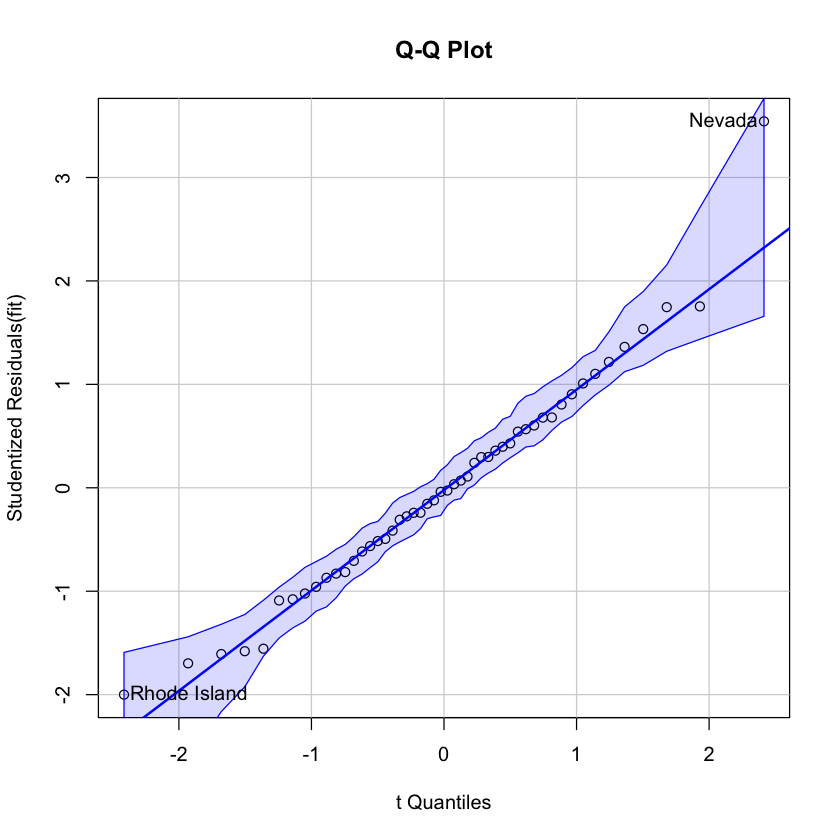

In [1]:
library(car)
states <- as.data.frame(
  state.x77[, c("Murder", "Population", "Illiteracy", "Income", "Frost")]
)
fit <- lm(
  Murder ~ Population + Illiteracy + Income + Frost,
  data = states
)

par(bg = "white")
qqPlot(
  fit,
  labels = row.names(states),
  id.method = "identify",
  simulate = TRUE,
  main = "Q-Q Plot"
)

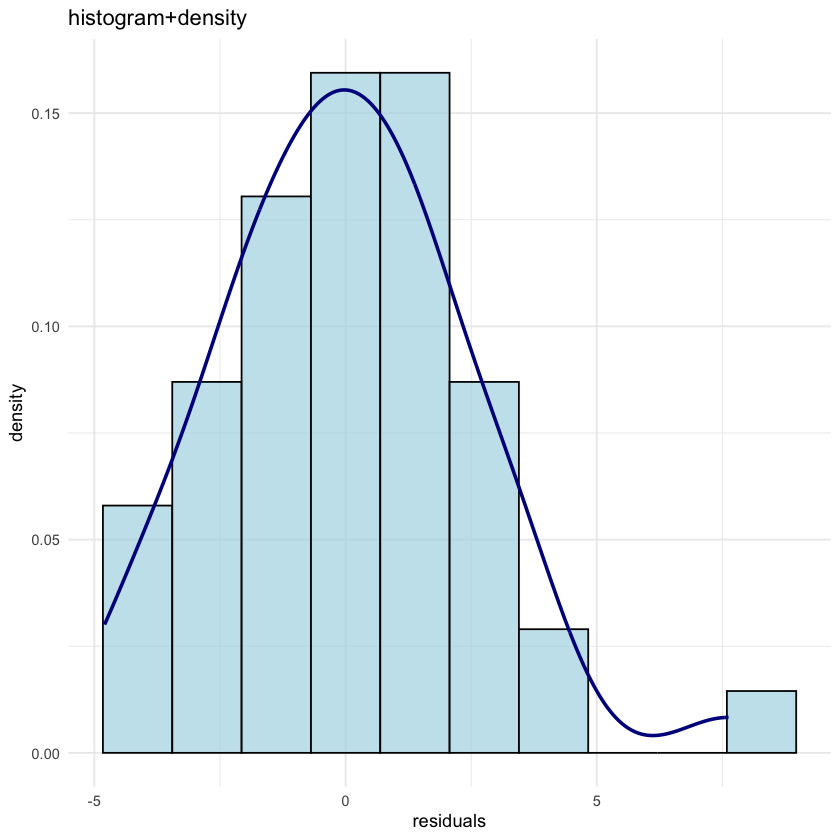

In [4]:
# 提取残差并转化为数据框
res <- residuals(fit)
df <- data.frame(res = res)

# 使用ggplot2绘制直方图+密度曲线
library(ggplot2)
ggplot(data = df, aes(x = res)) +
  geom_histogram(
    aes(y = after_stat(density)),
    bins = 10,               # 控制柱子的数量
    fill = "lightblue",
    color = "black",          # 直方图边框颜色
    alpha = 0.7
  ) +            # 透明度控制
  geom_density(
    color = "darkblue",
    linewidth = 1
  ) +            # 密度曲线样式
  theme_minimal() +                        # 使用简约主题
  labs(
    title = "histogram+density",
    x = "residuals",
    y = "density"
  )

In [5]:
shapiro.test(res)

# Shapiro-Wilk normality test

# data:  res
# W = 0.98264, p-value = 0.6672


	Shapiro-Wilk normality test

data:  res
W = 0.98264, p-value = 0.6672


In [6]:
mean_res <- mean(res)
mean_sd <- sd(res)
ks.test(res, "pnorm", mean = mean_res, sd = mean_sd)

# Exact one-sample Kolmogorov-Smirnov test

# data:  res
# D = 0.043837, p-value = 0.9999
# alternative hypothesis: two-sided


	Exact one-sample Kolmogorov-Smirnov test

data:  res
D = 0.043837, p-value = 0.9999
alternative hypothesis: two-sided


In [7]:
install.packages("nortest")


The downloaded binary packages are in
	/var/folders/fv/c0dh9y6s7638rh5fdr3lgcmr0000gn/T//RtmpBha9Xk/downloaded_packages


In [8]:
library(nortest)
ad.test(res)

# Anderson-Darling normality test

# data:  res
# A = 0.12724, p-value = 0.9834


	Anderson-Darling normality test

data:  res
A = 0.12724, p-value = 0.9834


In [9]:
library(tseries)
jarque.bera.test(res)

# Jarque Bera Test

# data:  res
# X-squared = 2.175, df = 2, p-value = 0.3371

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 




	Jarque Bera Test

data:  res
X-squared = 2.175, df = 2, p-value = 0.3371


In [10]:
reg_test_normal <- function(fit) {
  # 提取残差
  res <- residuals(fit)

  # 绘制Q-Q图
  library(car)
  par(bg = "white")
  qqPlot(
    fit,
    id.method = "identify",
    simulate = TRUE,
    main = "Q-Q Plot"
  )

  # 绘制直方图+密度曲线
  library(ggplot2)
  df <- data.frame(res = res)
  p <- ggplot(data = df, aes(x = res)) +
    geom_histogram(
      aes(y = after_stat(density)),
      bins = 10,               # 控制柱子的数量
      fill = "lightblue",
      color = "black",          # 直方图边框颜色
      alpha = 0.7
    ) +            # 透明度控制
    geom_density(
      color = "darkblue",
      linewidth = 1
    ) +            # 密度曲线样式
    theme_minimal() +                        # 使用简约主题
    labs(
      title = "histogram+density",
      x = "residuals",
      y = "density"
    )
  print(p)

  # 正态性检验
  # Shapiro-Wilk normality test
  sw_test <- shapiro.test(res)
  print(sw_test)
  if (sw_test$p.value < 0.05) {
    cat("Shapiro-Wilk test: Residuals are not normally distributed.\n")
  } else {
    cat("Shapiro-Wilk test: Residuals are normally distributed.\n")
  }
  # 分割线
  cat(strrep("-", 100))

  # Kolmogorov-Smirnov test
  ks_test <- ks.test(res, "pnorm", mean = mean(res), sd = sd(res))
  print(ks_test)
  if (ks_test$p.value < 0.05) {
    cat("Kolmogorov-Smirnov test: Residuals are not normally distributed.\n")
  } else {
    cat("Kolmogorov-Smirnov test: Residuals are normally distributed.\n")
  }
  # 分割线
  cat(strrep("-", 100))

  # Anderson-Darling normality test
  library(nortest)
  ad_test <- ad.test(res)
  print(ad_test)
  if (ad_test$p.value < 0.05) {
    cat("Anderson-Darling test: Residuals are not normally distributed.\n")
  } else {
    cat("Anderson-Darling test: Residuals are normally distributed.\n")
  }
  # 分割线
  cat(strrep("-", 100))

  # Jarque Bera Test
  library(tseries)
  jb_test <- jarque.bera.test(res)
  print(jb_test)
  if (jb_test$p.value < 0.05) {
    cat("Jarque Bera test: Residuals are not normally distributed.\n")
  } else {
    cat("Jarque Bera test: Residuals are normally distributed.\n")
  }
  # 分割线
  cat(strrep("-", 100))
}

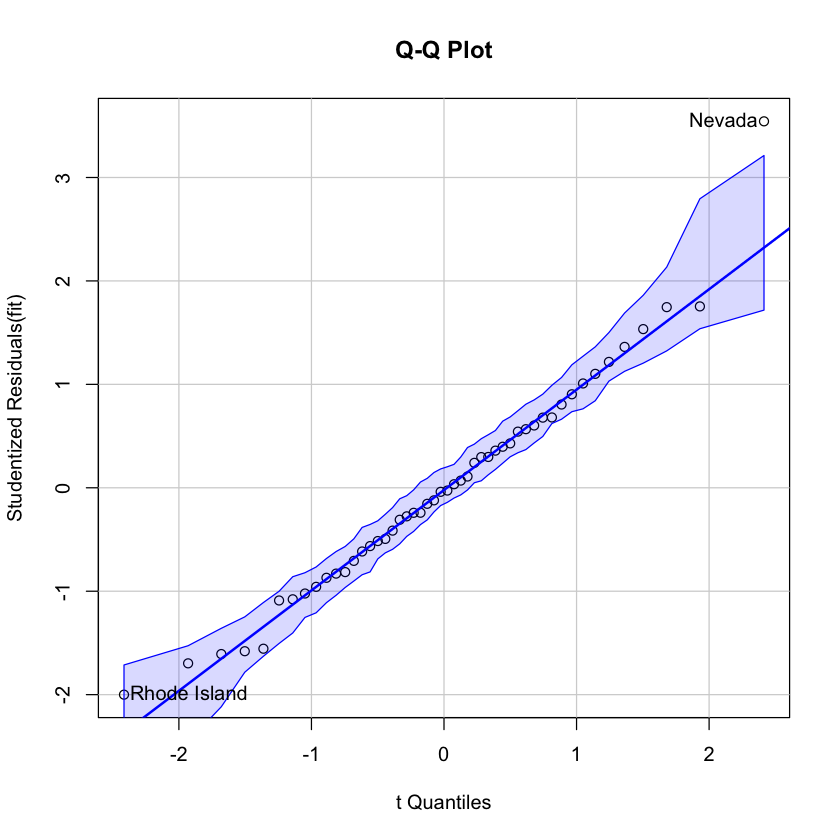


	Shapiro-Wilk normality test

data:  res
W = 0.98264, p-value = 0.6672

Shapiro-Wilk test: Residuals are normally distributed.
----------------------------------------------------------------------------------------------------
	Exact one-sample Kolmogorov-Smirnov test

data:  res
D = 0.043837, p-value = 0.9999
alternative hypothesis: two-sided

Kolmogorov-Smirnov test: Residuals are normally distributed.
----------------------------------------------------------------------------------------------------
	Anderson-Darling normality test

data:  res
A = 0.12724, p-value = 0.9834

Anderson-Darling test: Residuals are normally distributed.
----------------------------------------------------------------------------------------------------
	Jarque Bera Test

data:  res
X-squared = 2.175, df = 2, p-value = 0.3371

Jarque Bera test: Residuals are normally distributed.
----------------------------------------------------------------------------------------------------

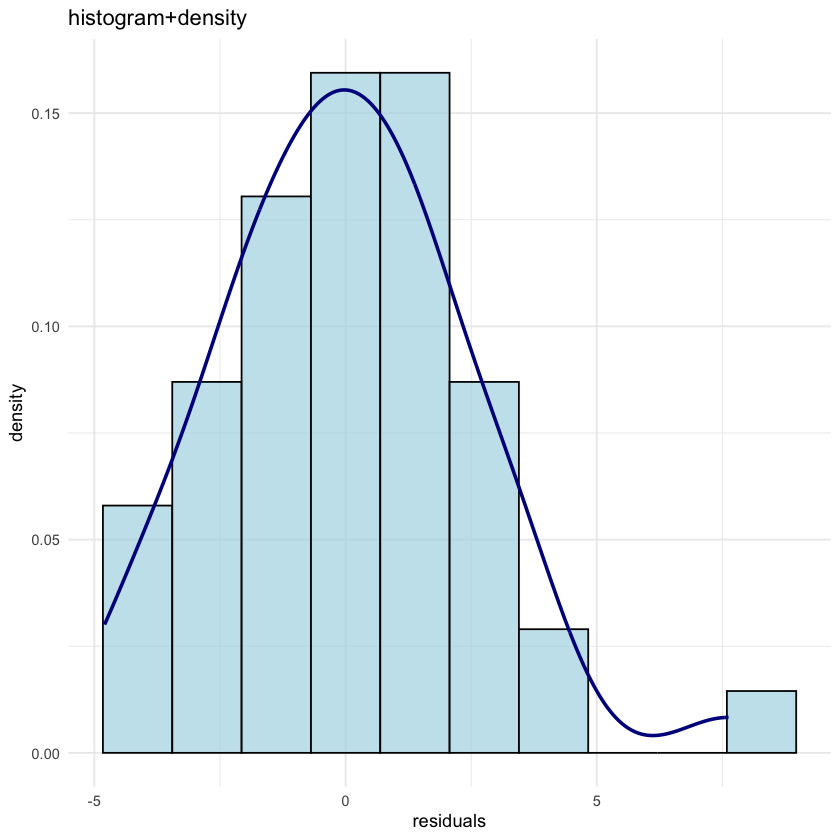

In [11]:
reg_test_normal(fit)

## 异方差检验


Suggested power transformation:  1.209626 

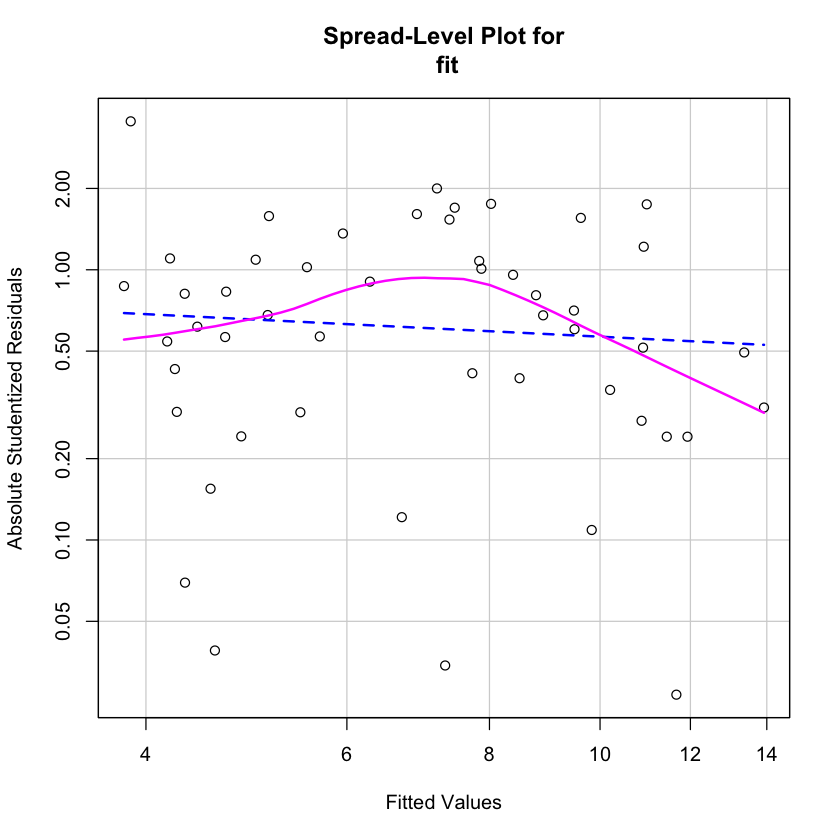

In [12]:
library(car)
par(bg = "white")
spreadLevelPlot(fit)

In [13]:
library(lmtest)
bptest(fit)

# studentized Breusch-Pagan test

# data:  fit
# BP = 10.623, df = 4, p-value = 0.03115

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric





	studentized Breusch-Pagan test

data:  fit
BP = 10.623, df = 4, p-value = 0.03115


In [14]:
gqtest(fit)

# Goldfeld-Quandt test

# data:  fit
# GQ = 0.97047, df1 = 20, df2 = 20, p-value = 0.5264
# alternative hypothesis: variance increases from segment 1 to 2


	Goldfeld-Quandt test

data:  fit
GQ = 0.97047, df1 = 20, df2 = 20, p-value = 0.5264
alternative hypothesis: variance increases from segment 1 to 2


In [15]:
hmctest(fit)

# Harrison-McCabe test

# data:  fit
# HMC = 0.51299, p-value = 0.53


	Harrison-McCabe test

data:  fit
HMC = 0.51299, p-value = 0.548


In [16]:
reg_test_heteroscedasticity <- function(fit) {
  # 位置尺度图
  library(car)
  par(bg = "white")
  spreadLevelPlot(fit)

  # BP检验
  library(lmtest)
  bp_test <- bptest(fit)
  print(bp_test)
  if (bp_test$p.value < 0.05) {
    cat("Breusch-Pagan test: Residuals are heteroscedastic.\n")
  } else {
    cat("Breusch-Pagan test: Residuals are homoscedastic.\n")
  }

  # GQ检验
  gq_test <- gqtest(fit)
  print(gq_test)
  if (gq_test$p.value < 0.05) {
    cat("Goldfeld-Quandt test: Residuals are heteroscedastic.\n")
  } else {
    cat("Goldfeld-Quandt test: Residuals are homoscedastic.\n")
  }

  # HMC检验
  hmc_test <- hmctest(fit)
  print(hmc_test)
  if (hmc_test$p.value < 0.05) {
    cat("Harrison-McCabe test: Residuals are heteroscedastic.\n")
  } else {
    cat("Harrison-McCabe test: Residuals are homoscedastic.\n")
  }
}


	studentized Breusch-Pagan test

data:  fit
BP = 10.623, df = 4, p-value = 0.03115

Breusch-Pagan test: Residuals are heteroscedastic.

	Goldfeld-Quandt test

data:  fit
GQ = 0.97047, df1 = 20, df2 = 20, p-value = 0.5264
alternative hypothesis: variance increases from segment 1 to 2

Goldfeld-Quandt test: Residuals are homoscedastic.

	Harrison-McCabe test

data:  fit
HMC = 0.51299, p-value = 0.542

Harrison-McCabe test: Residuals are homoscedastic.


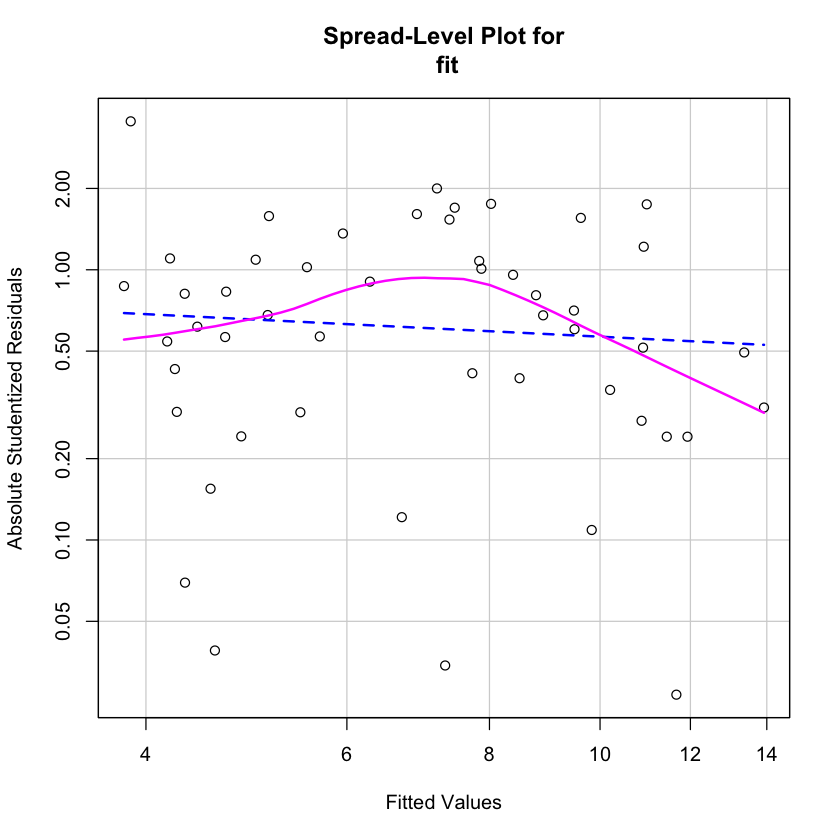

In [17]:
reg_test_heteroscedasticity(fit)

## 自相关检验

In [18]:
library(lmtest)
bgtest(fit)

# Breusch-Godfrey test for serial correlation of order up to 1

# data:  fit
# LM test = 2.2707, df = 1, p-value = 0.1318


	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit
LM test = 2.2707, df = 1, p-value = 0.1318


In [19]:
dwtest(fit)

# Durbin-Watson test

# data:  fit
# DW = 2.3177, p-value = 0.8705
# alternative hypothesis: true autocorrelation is greater than 0


	Durbin-Watson test

data:  fit
DW = 2.3177, p-value = 0.8705
alternative hypothesis: true autocorrelation is greater than 0


In [20]:
Box.test(fit$residuals, lag = 1, type = "Box-Pierce")

# Box-Pierce test

# data:  fit$residuals
# X-squared = 2.0139, df = 1, p-value = 0.1559


	Box-Pierce test

data:  fit$residuals
X-squared = 2.0139, df = 1, p-value = 0.1559


In [21]:
Box.test(fit$residuals, lag = 13, type = "Ljung-Box")

# Box-Ljung test

# data:  fit$residuals
# X-squared = 13.417, df = 13, p-value = 0.4161


	Box-Ljung test

data:  fit$residuals
X-squared = 13.417, df = 13, p-value = 0.4161


In [22]:
reg_test_autocorrelation <- function(fit) {
  # BP检验
  library(lmtest)
  bg_test <- bgtest(fit)
  print(bg_test)
  if (bg_test$p.value < 0.05) {
    cat("Breusch-Godfrey test: Residuals are autocorrelated.\n")
  } else {
    cat("Breusch-Godfrey test: Residuals are not autocorrelated.\n")
  }

  # DW检验
  dw_test <- dwtest(fit)
  print(dw_test)
  if (dw_test$p.value < 0.05) {
    cat("Durbin-Watson test: Residuals are autocorrelated.\n")
  } else {
    cat("Durbin-Watson test: Residuals are not autocorrelated.\n")
  }

  # Box-Pierce检验
  bp_test <- Box.test(fit$residuals, lag = 1, type = "Box-Pierce")
  print(bp_test)
  if (bp_test$p.value < 0.05) {
    cat("Box-Pierce test: Residuals are autocorrelated.\n")
  } else {
    cat("Box-Pierce test: Residuals are not autocorrelated.\n")
  }

  # Box-Ljung检验
  bl_test <- Box.test(fit$residuals, lag = 13, type = "Ljung-Box")
  print(bl_test)
  if (bl_test$p.value < 0.05) {
    cat("Box-Ljung test: Residuals are autocorrelated.\n")
  } else {
    cat("Box-Ljung test: Residuals are not autocorrelated.\n")
  }
}

In [23]:
reg_test_autocorrelation(fit)


	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit
LM test = 2.2707, df = 1, p-value = 0.1318

Breusch-Godfrey test: Residuals are not autocorrelated.

	Durbin-Watson test

data:  fit
DW = 2.3177, p-value = 0.8705
alternative hypothesis: true autocorrelation is greater than 0

Durbin-Watson test: Residuals are not autocorrelated.

	Box-Pierce test

data:  fit$residuals
X-squared = 2.0139, df = 1, p-value = 0.1559

Box-Pierce test: Residuals are not autocorrelated.

	Box-Ljung test

data:  fit$residuals
X-squared = 13.417, df = 13, p-value = 0.4161

Box-Ljung test: Residuals are not autocorrelated.


## 线性假定检验

`geom_smooth()` using formula = 'y ~ x'


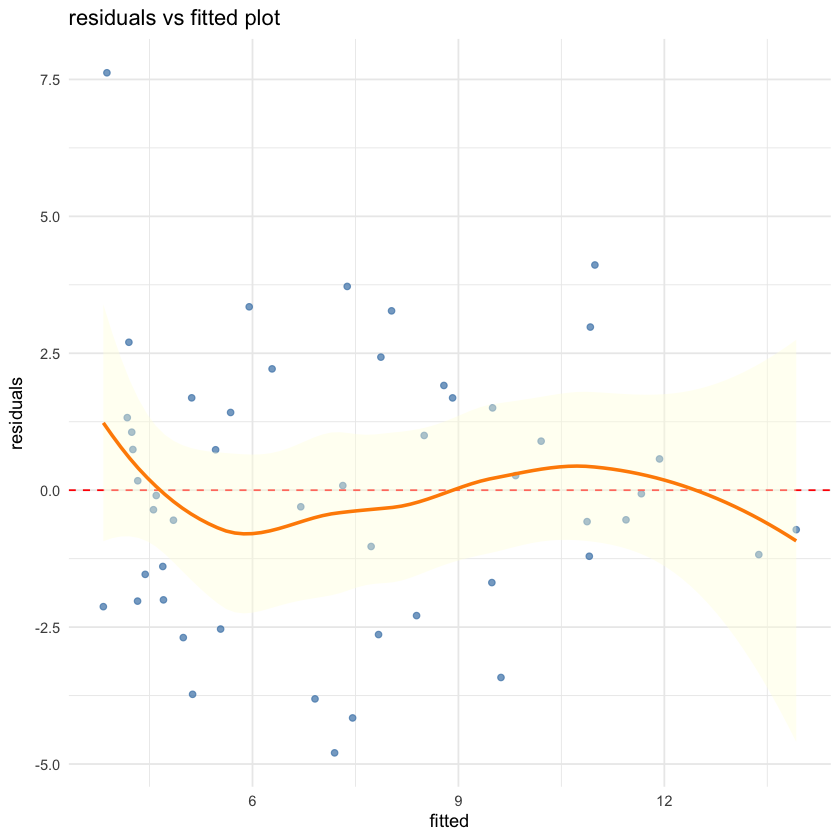

In [26]:
res <- residuals(fit)
fitted <- fitted(fit)
df <- data.frame(residuals = res, fitted = fitted)

# 绘图
ggplot(df, aes(x = fitted, y = residuals)) +
  geom_point(color = "steelblue", alpha = 0.7) +
  geom_hline(yintercept = 0, color = "red", linetype = "dashed") +
  geom_smooth(
    method = "loess",
    color = "darkorange",
    fill = "lightyellow",
    se = TRUE
  ) +
  labs(title = "residuals vs fitted plot", x = "fitted", y = "residuals") +
  theme_minimal()

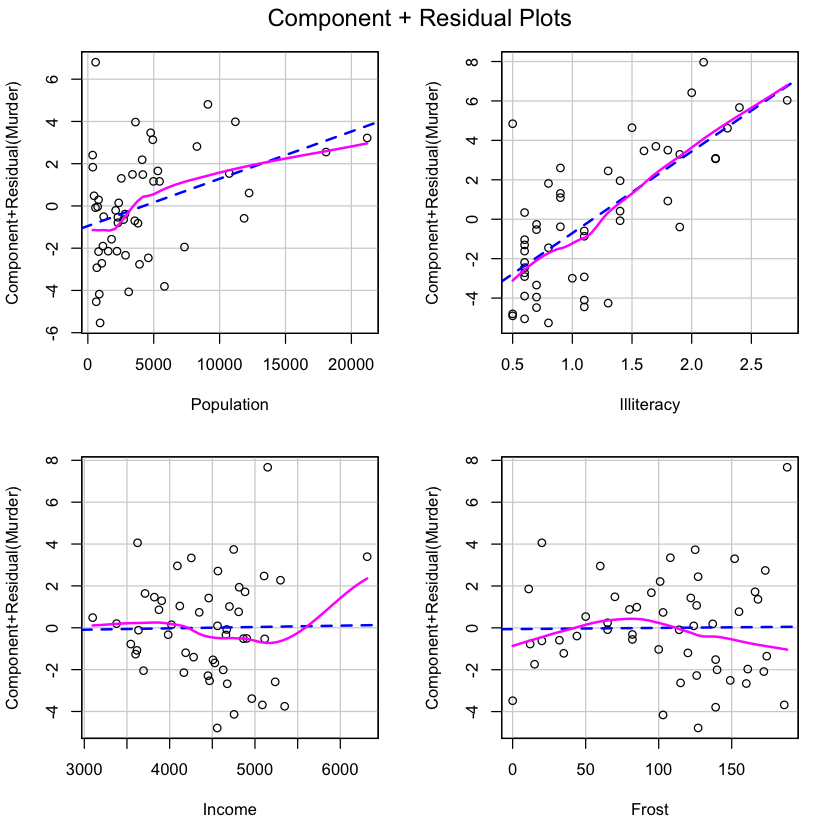

In [28]:
library(car)
par(bg = "white")
crPlots(fit)

In [ ]:
library(lmtest)
harvtest(fit)

# Harvey-Collier test

# data:  fit
# HC = 1.2847, df = 44, p-value = 0.2056


	Harvey-Collier test

data:  fit
HC = 1.2847, df = 44, p-value = 0.2056


In [ ]:
raintest(fit)

# Rainbow test

# data:  fit
# Rain = 0.66388, df1 = 25, df2 = 20, p-value = 0.8351


	Rainbow test

data:  fit
Rain = 0.66388, df1 = 25, df2 = 20, p-value = 0.8351


In [ ]:
resettest(fit)

# RESET test

# data:  fit
# RESET = 1.3243, df1 = 2, df2 = 43, p-value = 0.2766


	RESET test

data:  fit
RESET = 1.3243, df1 = 2, df2 = 43, p-value = 0.2766


In [34]:
reg_test_linear <- function(fit) {
  # 位置尺度图
  res <- residuals(fit)
  fitted <- fitted(fit)
  df <- data.frame(residuals = res, fitted = fitted)

  # 绘图
  library(ggplot2)
  p <- ggplot(df, aes(x = fitted, y = residuals)) +
    geom_point(color = "steelblue", alpha = 0.7) +
    geom_hline(yintercept = 0, color = "red", linetype = "dashed") +
    geom_smooth(
      method = "loess",
      color = "darkorange",
      fill = "lightyellow",
      se = TRUE
    ) +
    labs(title = "residuals vs fitted plot", x = "fitted", y = "residuals") +
    theme_minimal()
  print(p)

  # 偏残差图
  library(car)
  par(bg = "white")
  crPlots(fit)

  # Harvey-Collier检验
  library(lmtest)
  hc_test <- harvtest(fit)
  print(hc_test)
  if (hc_test$p.value < 0.05) {
    cat("Harvey-Collier test: Model is not linear.\n")
  } else {
    cat("Harvey-Collier test: Model is linear.\n")
  }
  # 分割线
  cat(strrep("-", 100))

  # Rainbow检验
  rain_test <- raintest(fit)
  print(rain_test)
  if (rain_test$p.value < 0.05) {
    cat("Rainbow test: Model is not linear.\n")
  } else {
    cat("Rainbow test: Model is linear.\n")
  }
  # 分割线
  cat(strrep("-", 100))

  # RESET检验
  reset_test <- resettest(fit)
  print(reset_test)
  if (reset_test$p.value < 0.05) {
    cat("RESET test: Model is not linear.\n")
  } else {
    cat("RESET test: Model is linear.\n")
  }
}

`geom_smooth()` using formula = 'y ~ x'


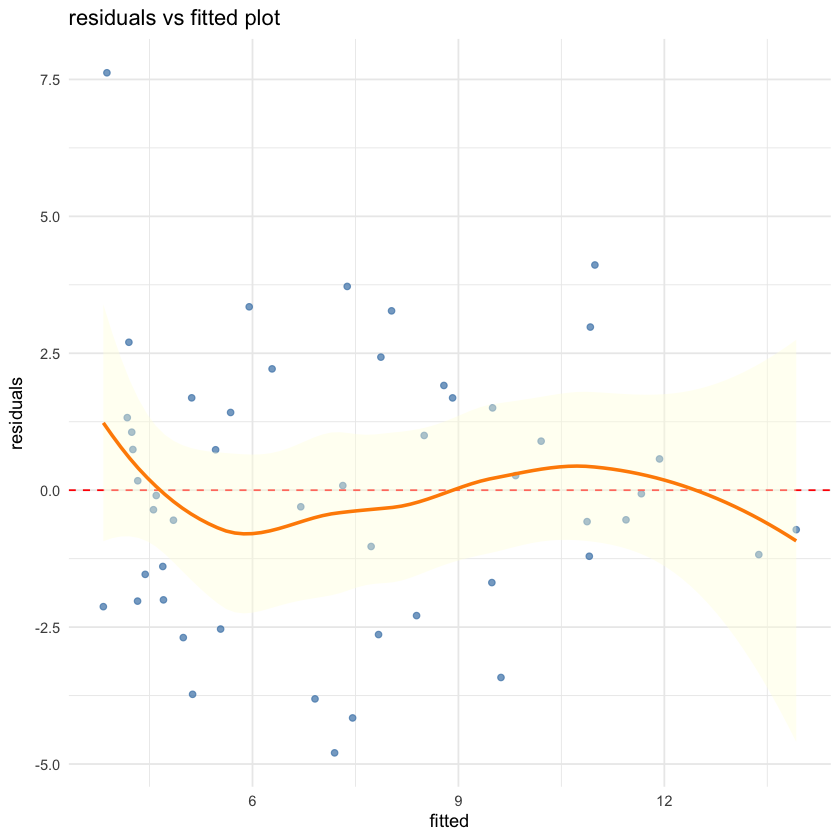


	Harvey-Collier test

data:  fit
HC = 1.2847, df = 44, p-value = 0.2056

Harvey-Collier test: Model is linear.
----------------------------------------------------------------------------------------------------
	Rainbow test

data:  fit
Rain = 0.66388, df1 = 25, df2 = 20, p-value = 0.8351

Rainbow test: Model is linear.
----------------------------------------------------------------------------------------------------
	RESET test

data:  fit
RESET = 1.3243, df1 = 2, df2 = 43, p-value = 0.2766

RESET test: Model is linear.


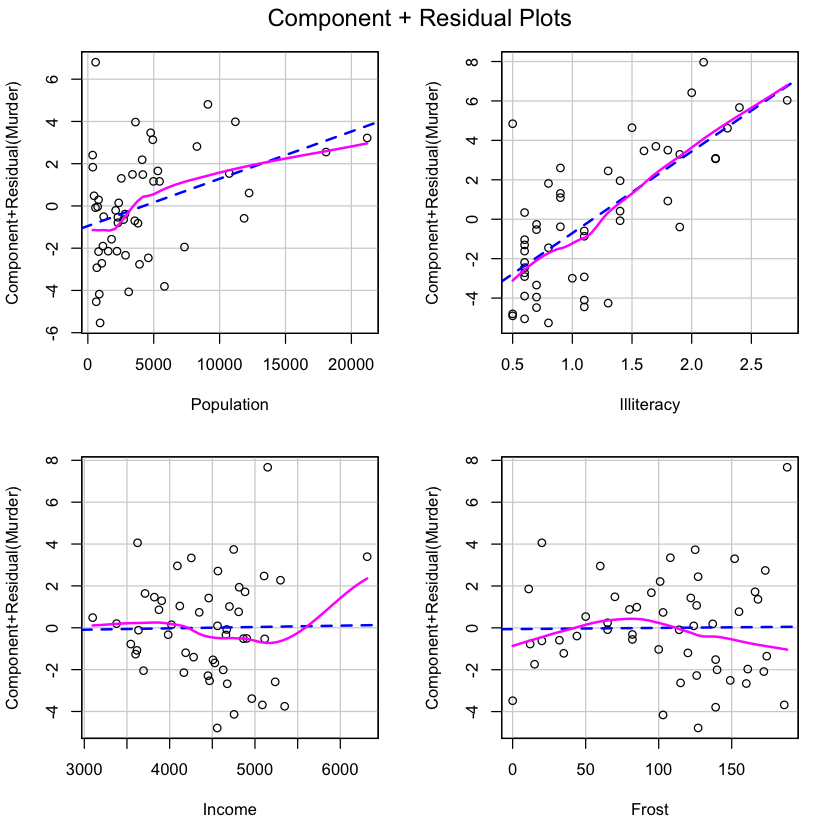

In [35]:
reg_test_linear(fit)

## 多重共线性诊断

In [ ]:
library(tidyverse)
library(car)
vif <- vif(fit)
df_vif <- data.frame(
  variable = names(vif),
  vif = vif
)
df_vif %>%
  mutate(
    `5+` = ifelse(vif > 5, "yes", "no"),
    `10+` = ifelse(vif > 10, "yes", "no")
  ) %>%
  print()

# variable      vif 5+ 10+
# Population Population 1.245282 no  no
# Illiteracy Illiteracy 2.165848 no  no
# Income         Income 1.345822 no  no
# Frost           Frost 2.082547 no  no

             variable      vif 5+ 10+
Population Population 1.245282 no  no
Illiteracy Illiteracy 2.165848 no  no
Income         Income 1.345822 no  no
Frost           Frost 2.082547 no  no


           Population Illiteracy     Income      Frost
Population  1.0000000  0.1076224  0.2082276 -0.3321525
Illiteracy  0.1076224  1.0000000 -0.4370752 -0.6719470
Income      0.2082276 -0.4370752  1.0000000  0.2262822
Frost      -0.3321525 -0.6719470  0.2262822  1.0000000


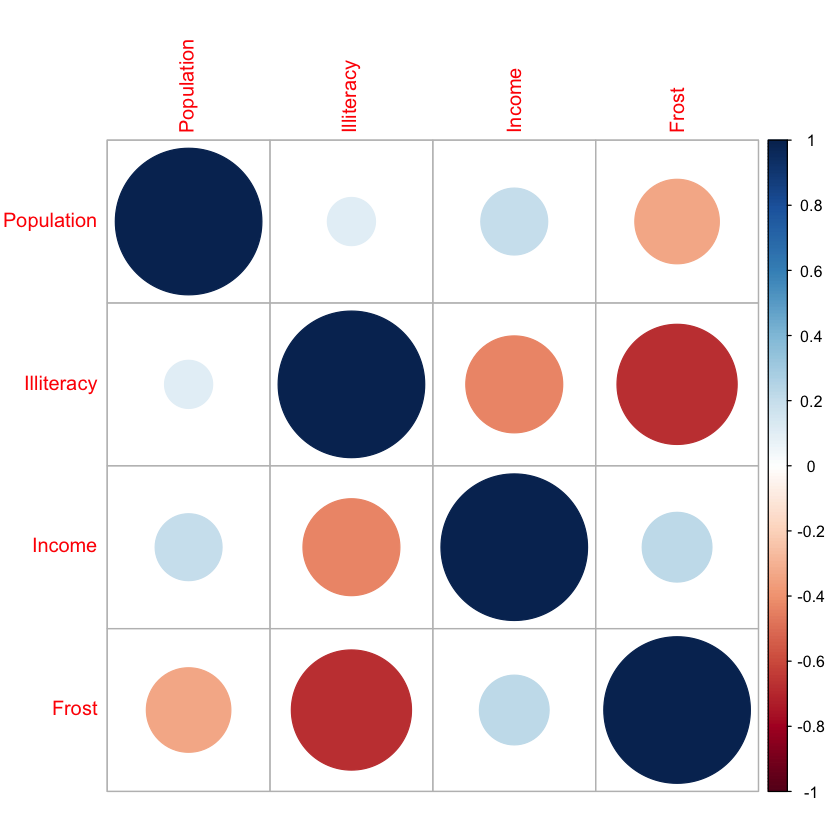

In [28]:
cor(
  states[c("Population", "Illiteracy", "Income", "Frost")]
) %>% print()
library(corrplot)
corrplot(
  cor(states[c("Population", "Illiteracy", "Income", "Frost")])
)

# Population Illiteracy     Income      Frost
# Population  1.0000000  0.1076224  0.2082276 -0.3321525
# Illiteracy  0.1076224  1.0000000 -0.4370752 -0.6719470
# Income      0.2082276 -0.4370752  1.0000000  0.2262822
# Frost      -0.3321525 -0.6719470  0.2262822  1.0000000

In [ ]:
library(mctest)
mctest(fit)

# Call:
# omcdiag(mod = mod, Inter = TRUE, detr = detr, red = red, conf = conf, 
#     theil = theil, cn = cn)


# Overall Multicollinearity Diagnostics

#                        MC Results detection
# Determinant |X'X|:         0.3527         0
# Farrar Chi-Square:        48.8119         1
# Red Indicator:             0.3784         0
# Sum of Lambda Inverse:     6.8395         0
# Theil's Method:           -0.1888         0
# Condition Number:         27.3908         0

# 1 --> COLLINEARITY is detected by the test 
# 0 --> COLLINEARITY is not detected by the test


Call:
omcdiag(mod = mod, Inter = TRUE, detr = detr, red = red, conf = conf, 
    theil = theil, cn = cn)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.3527         0
Farrar Chi-Square:        48.8119         1
Red Indicator:             0.3784         0
Sum of Lambda Inverse:     6.8395         0
Theil's Method:           -0.1888         0
Condition Number:         27.3908         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test


In [ ]:
omcdiag(fit)

# Call:
# omcdiag(mod = fit)


# Overall Multicollinearity Diagnostics

#                        MC Results detection
# Determinant |X'X|:         0.3527         0
# Farrar Chi-Square:        48.8119         1
# Red Indicator:             0.3784         0
# Sum of Lambda Inverse:     6.8395         0
# Theil's Method:           -0.1888         0
# Condition Number:         27.3908         0

# 1 --> COLLINEARITY is detected by the test 
# 0 --> COLLINEARITY is not detected by the test


Call:
omcdiag(mod = fit)


Overall Multicollinearity Diagnostics

                       MC Results detection
Determinant |X'X|:         0.3527         0
Farrar Chi-Square:        48.8119         1
Red Indicator:             0.3784         0
Sum of Lambda Inverse:     6.8395         0
Theil's Method:           -0.1888         0
Condition Number:         27.3908         0

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test


In [ ]:
imcdiag(fit)

# Call:
# imcdiag(mod = fit)


# All Individual Multicollinearity Diagnostics Result

#               VIF    TOL      Wi      Fi Leamer    CVIF Klein   IND1   IND2
# Population 1.2453 0.8030  3.7610  5.7641 0.8961 12.1445     0 0.0524 0.5211
# Illiteracy 2.1658 0.4617 17.8763 27.3974 0.6795 21.1222     0 0.0301 1.4240
# Income     1.3458 0.7430  5.3026  8.1268 0.8620 13.1250     0 0.0485 0.6798
# Frost      2.0825 0.4802 16.5991 25.4399 0.6930 20.3098     0 0.0313 1.3752

# 1 --> COLLINEARITY is detected by the test 
# 0 --> COLLINEARITY is not detected by the test

# Income , Frost , coefficient(s) are non-significant may be due to multicollinearity

# R-square of y on all x: 0.567 

# * use method argument to check which regressors may be the reason of collinearity
# ===================================


Call:
imcdiag(mod = fit)


All Individual Multicollinearity Diagnostics Result

              VIF    TOL      Wi      Fi Leamer    CVIF Klein   IND1   IND2
Population 1.2453 0.8030  3.7610  5.7641 0.8961 12.1445     0 0.0524 0.5211
Illiteracy 2.1658 0.4617 17.8763 27.3974 0.6795 21.1222     0 0.0301 1.4240
Income     1.3458 0.7430  5.3026  8.1268 0.8620 13.1250     0 0.0485 0.6798
Frost      2.0825 0.4802 16.5991 25.4399 0.6930 20.3098     0 0.0313 1.3752

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

Income , Frost , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.567 

* use method argument to check which regressors may be the reason of collinearity

In [44]:
reg_test_multicollinearity <- function(fit) {
  library(mctest)
  print(omcdiag(fit))
  print(imcdiag(fit))
}

In [43]:
reg_test_multicollinearity(fit)


Call:
imcdiag(mod = fit)


All Individual Multicollinearity Diagnostics Result

              VIF    TOL      Wi      Fi Leamer    CVIF Klein   IND1   IND2
Population 1.2453 0.8030  3.7610  5.7641 0.8961 12.1445     0 0.0524 0.5211
Illiteracy 2.1658 0.4617 17.8763 27.3974 0.6795 21.1222     0 0.0301 1.4240
Income     1.3458 0.7430  5.3026  8.1268 0.8620 13.1250     0 0.0485 0.6798
Frost      2.0825 0.4802 16.5991 25.4399 0.6930 20.3098     0 0.0313 1.3752

1 --> COLLINEARITY is detected by the test 
0 --> COLLINEARITY is not detected by the test

Income , Frost , coefficient(s) are non-significant may be due to multicollinearity

R-square of y on all x: 0.567 

* use method argument to check which regressors may be the reason of collinearity

In [11]:
# 随机生成回归数据
set.seed(123)
n <- 100
x1 <- rnorm(n)
x2 <- x1 + rnorm(n, 0, 0.01)  # x2与x1高度相关
x3 <- x1 + rnorm(n, 0, 0.01)  # x3与x1高度相关
e <- rnorm(n, 0, 1)
y <- 1 + 2 * x1 + 3 * x2 + 4 * x3 + e
data <- data.frame(y, x1, x2, x3)
print(head(data))

# y          x1          x2         x3
# 1  5.827828 -0.56047565 -0.71040656  2.1988103
# 2  5.807259 -0.23017749  0.25688371  1.3124130
# 3  1.378222  1.55870831 -0.24669188 -0.2651451
# 4  1.218652  0.07050839 -0.34754260  0.5431941
# 5 -3.690800  0.12928774 -0.95161857 -0.4143399
# 6  2.721238  1.71506499 -0.04502772 -0.4762469

           y          x1          x2          x3
1 -4.6928828 -0.56047565 -0.56757971 -0.53848754
2 -1.7640833 -0.23017749 -0.22760865 -0.21705336
3 14.0718296  1.55870831  1.55624140  1.55605686
4  0.5933637  0.07050839  0.06703297  0.07594033
5  1.6813079  0.12928774  0.11977155  0.12514434
6 16.7463633  1.71506499  1.71461471  1.71030252


In [13]:
fit <- lm(y ~ x1 + x2 + x3, data = data)
res <- residuals(fit)
mean(ifelse(abs(res) > 2, 1, 0))

[1] 0.06

# 异方差

In [14]:
head(women)

,height,weight
,<dbl>,<dbl>
1,58,115
2,59,117
3,60,120
4,61,123
5,62,126
6,63,129


In [ ]:
states <- as.data.frame(
  state.x77[, c("Murder", "Population", "Illiteracy", "Income", "Frost")]
)
fit <- lm(
  Murder ~ Population + Illiteracy + Income + Frost,
  data = states
)

library(sandwich)
library(lmtest)
coeftest(fit, vcov = vcovHC)

# t test of coefficients:

#               Estimate Std. Error t value  Pr(>|t|)    
# (Intercept) 1.2346e+00 6.2672e+00  0.1970 0.8447237    
# Population  2.2368e-04 8.7995e-05  2.5419 0.0145380 *  
# Illiteracy  4.1428e+00 9.8631e-01  4.2003 0.0001243 ***
# Income      6.4425e-05 1.1343e-03  0.0568 0.9549584    
# Frost       5.8131e-04 1.1099e-02  0.0524 0.9584608    
# ---
# Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric





t test of coefficients:

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 1.2346e+00 6.2672e+00  0.1970 0.8447237    
Population  2.2368e-04 8.7995e-05  2.5419 0.0145380 *  
Illiteracy  4.1428e+00 9.8631e-01  4.2003 0.0001243 ***
Income      6.4425e-05 1.1343e-03  0.0568 0.9549584    
Frost       5.8131e-04 1.1099e-02  0.0524 0.9584608    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [ ]:
# 进行HAC回归
# 先进行普通回归
fit <- lm(consumption ~ price + income + temp, data = icecream)

# 构建HAC标准误
library(sandwich)
HAC <- NeweyWest(fit, lag = 3)

# 进行系数检验
library(lmtest)
coeftest(fit, vcov. = HAC)


# t test of coefficients:

#                Estimate  Std. Error t value  Pr(>|t|)  
# (Intercept)  0.19731489  0.33503035  0.5889  0.560980  
# price       -1.04441312  0.99293930 -1.0518  0.302551  
# income       0.00330776  0.00098235  3.3672  0.002373 ** 
# temp         0.00345843  0.00051366  6.7329 3.821e-07 ***
# ---
# Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1